In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import shap
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler
import random
import time
from operator import itemgetter
import gc
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

In [17]:
df = pd.read_excel("C:/Users/sdomi/OneDrive/Pulpit/datamaster_final(4).xlsx")

In [18]:
pd.set_option('display.max_columns', 150)

In [19]:
df

,municipality_code,municipality_name,county_code,percent_vaccinated,urbanization_rate,healthcare_advices,installations_watersupply,installations_toilet,installations_central_heating,installations_network_gas,persons_per_appartment,persons_per_library,library_books_per_1000_persons,library_readers_per_1000_persons,library_loans_per_reader,forests_area,bicycle_paths_per_100km2,bicycle_paths_per_10k_persons,revenues_per_capita_PIT,revenues_per_capita_CIT,investment_expenditures_per_capita,children_3_5_in_kindergartens,marriages_per_1000_persons,birthrate_per_1000_persons,net_migrations_per_1000_persons,entities_registered_per_10k_persons,Prussian,Russian,frekwencja,glosy_niewazne,glosy_KO,glosy_KONF,glosy_PSL,glosy_SLD,pop_t_0_19_perc,pop_t_40_49_perc,pop_t_20_29_perc,pop_t_50_59_perc,pop_t_60_84_perc,pop_f_all_perc,avg_gosp_wiejskie,high_exposure,index_ineq,average_wage_relative,doctors_per_1000_persons,beds_in_hospitals,cars_per_1000_persons,motorcycles_per_1000_persons,education_share_higher,education_share_secondary,education_share_vocational,tourits_per_1000_persons,population_total_log,unemployment_50,unemployment_25,area_km2,rolny_revenue_ratio,type_agr,type_0_20k,type_50_100k,type_500k+,type_100_500k,long,lat
0,201011,Bolesławiec,201000,56.9,100.0,202393.0,98.5,98.0,87.1,90.6,2.25,18830,2959,143,11.3,75.18,157.40,9.85,1067.74,56.58,142.34,1117.0,3.2,-6.04,-5.3,1323,1,0,60.88,1.15,23.95,6.16,5.40,22.22,0.128362,0.197084,0.094825,0.113306,0.286651,0.513848,12.74,247.39,0.395228,88.5,14.3,235,613.5,31.4,17.43,35.08,25.51,427.36,10.536327,0.004793,0.001965,24,0.000176,0,0,0,0,0,15.562854,51.259974
1,201022,Bolesławiec,201000,47.7,0.0,13532.0,97.8,97.2,83.2,28.8,3.27,2495,4849,119,12.2,230.52,3.95,7.62,926.60,11.74,895.71,581.0,3.2,-0.60,12.5,1086,1,0,56.54,1.47,19.24,7.58,9.27,14.94,0.170241,0.217612,0.116189,0.130621,0.197100,0.491815,12.34,137.67,0.403564,88.5,14.3,235,613.5,31.4,17.43,35.08,25.51,427.36,9.613603,0.004376,0.003441,289,0.014061,1,0,0,0,0,15.571795,51.304692
2,201032,Gromadka,201000,49.5,0.0,11221.0,96.1,93.6,79.1,0.2,2.89,5156,2921,37,12.6,204.00,0.00,0.00,690.41,162.36,1196.25,662.0,2.1,-3.48,-1.4,673,1,0,52.83,2.42,12.93,5.27,6.94,19.28,0.143134,0.203646,0.122770,0.124709,0.236036,0.487587,15.47,-37.80,0.401945,88.5,14.3,235,613.5,31.4,17.43,35.08,25.51,427.36,8.547916,0.005140,0.003200,268,0.005718,1,0,0,0,0,15.735928,51.408432
3,201043,Nowogrodziec,201000,47.5,28.1,47211.0,96.8,95.9,77.3,14.2,3.27,2970,2939,48,8.3,251.00,0.00,0.00,644.43,30.53,379.00,615.0,4.1,-0.67,0.5,871,1,0,48.79,1.91,15.70,7.73,9.60,9.75,0.164961,0.204350,0.120657,0.128064,0.202397,0.487948,12.43,281.64,0.327408,88.5,14.3,235,613.5,31.4,17.43,35.08,25.51,427.36,9.605890,0.005050,0.003232,176,0.013454,0,1,0,0,0,15.357853,51.214465
4,201052,Osiecznica,201000,52.2,0.0,38508.0,96.0,95.7,71.6,4.1,2.52,1226,6674,167,7.8,43.13,0.00,0.00,786.19,27.93,282.14,762.0,4.8,-2.15,1.7,896,1,0,49.94,2.49,19.38,6.97,8.23,15.61,0.173824,0.213781,0.122995,0.116608,0.190541,0.484914,9.18,348.40,0.399728,88.5,14.3,235,613.5,31.4,17.43,35.08,25.51,427.36,8.903543,0.005504,0.002922,437,0.002707,1,0,0,0,0,15.418397,51.391581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2472,3218043,Resko,3218000,55.0,54.2,12945.0,98.6,94.9,72.4,27.6,2.68,7470,4272,77,21.7,249.78,0.42,1.61,878.57,33.35,1068.83,784.0,3.1,-11.69,-1.5,1068,1,0,46.70,2.40,28.53,5.29,11.01,14.52,0.145649,0.189826,0.111647,0.132798,0.252744,0.480455,47.30,644.24,0.228085,85.3,7.8,0,691.4,75.0,12.98,31.97,25.33,186.00,8.918650,0.018675,0.010442,285,0.024286,0,1,0,0,0,15.442789,53.771776
2473,3218053,Węgorzyno,3218000,51.9,41.2,12137.0,97.4,92.7,72.2,3.7,2.69,2154,3068,141,19.8,275.15,0.00,0.00,537.42,20.72,2256.17,694.0,3.6,-5.87,-1.9,839,1,0,46.74,1.92,23.13,5.75,12.82,10.07,0.157512,0.

In [20]:
features =df.columns.tolist()
target = 'percent_vaccinated'
features.remove(target)
features = [feature for feature in features if feature not in ['municipality_code', 'municipality_name', 'county_code']]

In [21]:
continous = features.copy()
continous = [item for item in continous if item not in ['Prussian', 'Russian', 'type_agr', 'type_0_20k', 
                                                        'type_50_100k', 'type_500k+', 'type_100_500k']]
df[continous]             

,urbanization_rate,healthcare_advices,installations_watersupply,installations_toilet,installations_central_heating,installations_network_gas,persons_per_appartment,persons_per_library,library_books_per_1000_persons,library_readers_per_1000_persons,library_loans_per_reader,forests_area,bicycle_paths_per_100km2,bicycle_paths_per_10k_persons,revenues_per_capita_PIT,revenues_per_capita_CIT,investment_expenditures_per_capita,children_3_5_in_kindergartens,marriages_per_1000_persons,birthrate_per_1000_persons,net_migrations_per_1000_persons,entities_registered_per_10k_persons,frekwencja,glosy_niewazne,glosy_KO,glosy_KONF,glosy_PSL,glosy_SLD,pop_t_0_19_perc,pop_t_40_49_perc,pop_t_20_29_perc,pop_t_50_59_perc,pop_t_60_84_perc,pop_f_all_perc,avg_gosp_wiejskie,high_exposure,index_ineq,average_wage_relative,doctors_per_1000_persons,beds_in_hospitals,cars_per_1000_persons,motorcycles_per_1000_persons,education_share_higher,education_share_secondary,education_share_vocational,tourits_per_1000_persons,population_total_log,unemployment_50,unemployment_25,area_km2,rolny_revenue_ratio,long,lat
0,100.0,202393.0,98.5,98.0,87.1,90.6,2.25,18830,2959,143,11.3,75.18,157.40,9.85,1067.74,56.58,142.34,1117.0,3.2,-6.04,-5.3,1323,60.88,1.15,23.95,6.16,5.40,22.22,0.128362,0.197084,0.094825,0.113306,0.286651,0.513848,12.74,247.39,0.395228,88.5,14.3,235,613.5,31.4,17.43,35.08,25.51,427.36,10.536327,0.004793,0.001965,24,0.000176,15.562854,51.259974
1,0.0,13532.0,97.8,97.2,83.2,28.8,3.27,2495,4849,119,12.2,230.52,3.95,7.62,926.60,11.74,895.71,581.0,3.2,-0.60,12.5,1086,56.54,1.47,19.24,7.58,9.27,14.94,0.170241,0.217612,0.116189,0.130621,0.197100,0.491815,12.34,137.67,0.403564,88.5,14.3,235,613.5,31.4,17.43,35.08,25.51,427.36,9.613603,0.004376,0.003441,289,0.014061,15.571795,51.304692
2,0.0,11221.0,96.1,93.6,79.1,0.2,2.89,5156,2921,37,12.6,204.00,0.00,0.00,690.41,162.36,1196.25,662.0,2.1,-3.48,-1.4,673,52.83,2.42,12.93,5.27,6.94,19.28,0.143134,0.203646,0.122770,0.124709,0.236036,0.487587,15.47,-37.80,0.401945,88.5,14.3,235,613.5,31.4,17.43,35.08,25.51,427.36,8.547916,0.005140,0.003200,268,0.005718,15.735928,51.408432
3,28.1,47211.0,96.8,95.9,77.3,14.2,3.27,2970,2939,48,8.3,251.00,0.00,0.00,644.43,30.53,379.00,615.0,4.1,-0.67,0.5,871,48.79,1.91,15.70,7.73,9.60,9.75,0.164961,0.204350,0.120657,0.128064,0.202397,0.487948,12.43,281.64,0.327408,88.5,14.3,235,613.5,31.4,17.43,35.08,25.51,427.36,9.605890,0.005050,0.003232,176,0.013454,15.357853,51.214465
4,0.0,38508.0,96.0,95.7,71.6,4.1,2.52,1226,6674,167,7.8,43.13,0.00,0.00,786.19,27.93,282.14,762.0,4.8,-2.15,1.7,896,49.94,2.49,19.38,6.97,8.23,15.61,0.173824,0.213781,0.122995,0.116608,0.190541,0.484914,9.18,348.40,0.399728,88.5,14.3,235,613.5,31.4,17.43,35.08,25.51,427.36,8.903543,0.005504,0.002922,437,0.002707,15.418397,51.391581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2472,54.2,12945.0,98.6,94.9,72.4,27.6,2.68,7470,4272,77,21.7,249.78,0.42,1.61,878.57,33.35,1068.83,784.0,3.1,-11.69,-1.5,1068,46.70,2.40,28.53,5.29,11.01,14.52,0.145649,0.189826,0.111647,0.132798,0.252744,0.480455,47.30,644.24,0.228085,85.3,7.8,0,691.4,75.0,12.98,31.97,25.33,186.00,8.918650,0.018675,0.010442,285,0.024286,15.442789,53.771776
2473,41.2,12137.0,97.4,92.7,72.2,3.7,2.69,2154,3068,141,19.8,275.15,0.00,0.00,537.42,20.72,2256.17,694.0,3.6,-5.87,-1.9,839,46.74,1.92,23.13,5.75,12.82,10.07,0.157512,0.187684,0.116819,0.131982,0.237970,0.478880,46.59,94.56,0.301059,85.3,7.8,0,691.4,75.0,12.98,31.97,25.33,186.00,8.773849,0.014544,0.006963,256,0.023760,15.530441,53.544616
2474,100.0,587171.0,99.8,99.1,93.3,87.6,2.22,9650,3535,131,17.0,123.16,89.59,8.30,1561.14,96.76,721.10,1056.0,3.7,-4.08,-1.3,1688,65.27,1.01,38.39,5.96,7.75,18.32,0.128938,0.201089,0.099452,0.110568,0.272044,0.509392,18.07,303.20,0.396194,90.0,39.5,580,569.4,20.2,29.82,36.16,16.67,0.00,11.572627,0.008822,0.00202

In [22]:
train, test = train_test_split(df, test_size=0.2, random_state=2020)

In [23]:
def CVForestReg(nFolds = 5, randomState=2020, debug=False, features=features, df=train, 
                saveModels = False, *args, **kwargs):

    kf = KFold(n_splits=nFolds, shuffle=True, random_state=randomState)

    testResults = []
    trainResults = []
    predictions = []
    indices = []
    models = []
    
    for train, test in kf.split(df.index.values):

        clf = RandomForestRegressor(*args, **kwargs, random_state=randomState, n_jobs=-1)

        X_train, y_train = df.iloc[train][features], df.iloc[train][target]
        X_test, y_test = df.iloc[test][features], df.iloc[test][target]
        
        if debug:
            print(clf)
        
        clf.fit(X_train, y_train)

        predsTrain = clf.predict(X_train)
        preds = clf.predict(X_test)
        
        predictions.append(preds.tolist().copy())
        
        indices.append(df.iloc[test].index.tolist().copy())
        
        trainScore = root_mean_squared_error(y_train, predsTrain)
        testScore = root_mean_squared_error(y_test, preds)
        
        trainResults.append(trainScore)
        testResults.append(testScore)
        
        if debug:
            print("Train RMSE:", trainScore,
                  "Valid RMSE:", testScore)
        if saveModels:
            models.append(clf)
        
    return trainResults, testResults, predictions, indices, models

In [24]:
results_rf =[]

for k in range(100):

    params = {
        "max_depth" : random.randint(7, 14),
        "max_features" : random.randint(20, 40),
        "min_samples_split" : random.randint(2, 10),
    }

    params["min_samples_leaf"] = random.randint(1, params["min_samples_split"])
    

    trainResults, testResults, predictions, indices, models = CVForestReg(n_estimators=100, df=train, features=features,
                                                                    max_depth=params["max_depth"],
                                                                    max_features=params["max_features"],
                                                                    min_samples_split=params["min_samples_split"],
                                                                    min_samples_leaf=params["min_samples_leaf"])
    
    results_rf.append((np.mean(testResults), params.copy()))
    
    print(params, np.mean(testResults))
    
    if k>1 and k%10==0:    
        print("\n Top 5:")
        for score, params in sorted(results_rf, key=lambda x: x[0], reverse=False)[0:5]:
            print(params, score)
        print()

{'max_depth': 12, 'max_features': 27, 'min_samples_split': 8, 'min_samples_leaf': 1} 3.748240897919447
{'max_depth': 14, 'max_features': 39, 'min_samples_split': 7, 'min_samples_leaf': 4} 3.754519115818053
{'max_depth': 10, 'max_features': 26, 'min_samples_split': 4, 'min_samples_leaf': 2} 3.7701666492700596
{'max_depth': 13, 'max_features': 27, 'min_samples_split': 9, 'min_samples_leaf': 8} 3.8562330506266265
{'max_depth': 13, 'max_features': 38, 'min_samples_split': 9, 'min_samples_leaf': 7} 3.841817872402035
{'max_depth': 7, 'max_features': 34, 'min_samples_split': 6, 'min_samples_leaf': 5} 3.920934572761145
{'max_depth': 11, 'max_features': 35, 'min_samples_split': 7, 'min_samples_leaf': 6} 3.8115249183502202
{'max_depth': 9, 'max_features': 31, 'min_samples_split': 5, 'min_samples_leaf': 1} 3.7864351728361307
{'max_depth': 13, 'max_features': 26, 'min_samples_split': 7, 'min_samples_leaf': 1} 3.7451411948502695
{'max_depth': 13, 'max_features': 23, 'min_samples_split': 3, 'min_sam

In [33]:
trainResults, testResults, predictions, indices, models = CVForestReg(n_estimators=100, df=train, features=features, 
                                                                      max_depth = 13, max_features = 38, min_samples_split = 4, 
                                                                    min_samples_leaf = 2, saveModels=True)
print(np.mean(trainResults), np.mean(testResults))

1.6361386125126824 3.718601173995259


In [34]:
imps_rf = list(zip(models[0].feature_importances_, features))
imps_rf.sort(reverse=True)
imps_rf

[(0.24508174203572422, 'glosy_SLD'),
 (0.13780128947580447, 'long'),
 (0.06030497867784143, 'entities_registered_per_10k_persons'),
 (0.05341512731656372, 'revenues_per_capita_PIT'),
 (0.03995537786777291, 'frekwencja'),
 (0.03483194117221623, 'glosy_KO'),
 (0.03290698757964064, 'cars_per_1000_persons'),
 (0.030802427393484592, 'lat'),
 (0.02489844697514321, 'pop_f_all_perc'),
 (0.024524742025850164, 'persons_per_appartment'),
 (0.023463443830401456, 'pop_t_60_84_perc'),
 (0.019288555128338835, 'education_share_higher'),
 (0.01921367251377674, 'unemployment_25'),
 (0.015480767159836198, 'pop_t_20_29_perc'),
 (0.013182859275896902, 'pop_t_50_59_perc'),
 (0.012367720450261155, 'forests_area'),
 (0.01151312640939148, 'motorcycles_per_1000_persons'),
 (0.009225389116635223, 'glosy_PSL'),
 (0.008543037792201195, 'average_wage_relative'),
 (0.007735602141722787, 'education_share_secondary'),
 (0.007405447012053321, 'children_3_5_in_kindergartens'),
 (0.007247278971546961, 'rolny_revenue_rati

In [35]:
rf = RandomForestRegressor(n_estimators=100, max_depth = 13, max_features = 38, min_samples_split = 4,min_samples_leaf = 2)
rf.fit(train[features], train[target].ravel())
pred = rf.predict(test[features])
print(root_mean_squared_error(pred, test[target]))

3.7630914282631363


In [56]:
# XGBoost

In [25]:
def run_xgb(train, validate, features, target, # argumenty obowiązkowe
            eta=0.03, max_depth=7, subsample = 0.7, colsample_bytree = 0.7, # hiperparametry
            colsample_bylevel=1,lambdaX = 1, alpha=0, gamma=0, min_child_weight=0, # hiperparametry
            rate_drop = 0.2, skip_drop=0.5, # hiperparametry
            num_boost_round = 400, early_stopping_rounds = 50, # hiperparametry
            debug=True, eval_metric= ["rmse"], objective = "reg:squarederror", # konfiguracja
            seed=2017, booster = "gbtree", tree_method="exact", grow_policy="depthwise"): # konfiguracja
   
    start_time = time.time()
    paramList= ['eta', 'max_depth',
         'subsample', 'colsample_bytree', 'colsample_bylevel',
         'lambdaX', 'alpha', 'gamma', 'min_child_weight',
         'num_boost_round', 'early_stopping_rounds',
         'rate_drop', 'skip_drop',
         'eval_metric', 'objective', 
          'seed', 'booster', 'tree_method', 'grow_policy']
    
    # Stworzenie słownika do przekazania do XGB
    params = dict()
    for param in paramList:
        params[param]=eval(param)
    if(debug):
        for param in paramList:
            print(param, eval(param), end=", ")
        print('\nLength train:', len(train.index))
        print('Length valid:', len(validate.index))

    # Automatyczne przekazanie liczby klas dla wielu poziomów klasyfikacji
    if (params["objective"]=="multi:softmax" or params["objective"]=="multi:softprob"):
        params["num_class"]=train[target].nunique()
    params["silent"]=1
    
    # XGB wymaga w słowniku parametrów słowa kluczowego lambda, poniżej workaround
    params["lambda"]=lambdaX
    
    # Przekształcenie zbiorów do struktury DMatrix
    # Struktura danych DMatrix pozwala na efektywne tworzenie drzew
    dtrain = xgb.DMatrix(train[features].values, train[target].values, feature_names=train[features].columns.values.tolist())
    dvalid = xgb.DMatrix(validate[features].values, validate[target].values, feature_names=validate[features].columns.values.tolist())

    # Stworzenie listy zbiorów do ealuacji
    evals = [(dtrain, 'train'), (dvalid, 'valid')]
    
    # Stworzenie zmiennej słownikowej do przekazania
    train_history = dict()

    # Uruchomienie algorytmu trenującego
    gbm = xgb.train(params, dtrain, 
                    num_boost_round, early_stopping_rounds=early_stopping_rounds,
                    evals=evals, evals_result=train_history, verbose_eval=debug)
    
    # Obliczenai statystyk i dodatkowych wartości
    score = gbm.best_score

    # Przekształcenie historii trenowania do Pandas Data Frame
    trainHistory = dict()
    for key in train_history.keys():
        for metric in train_history[key].keys():
            trainHistory[key+metric.upper()]=train_history[key][metric]
    train_history = pd.DataFrame(trainHistory)

    # Zapis przewidywanych wartości dla zbioru walidacyjnego dla najlepszej (z punktu widzenia walidacji) iteracji
    trainPred = gbm.predict(dtrain, iteration_range=(0, gbm.best_iteration+1))
    testPred = gbm.predict(dvalid, iteration_range=(0, gbm.best_iteration+1))

    # Przygotowanie posortowanej listy dla wazności zmiennych, zamaist słownika
    imp = gbm.get_fscore()
    imp = sorted(imp.items(), key=itemgetter(1), reverse=True)

    impFig=None
    if(debug):
        print('Czas trenowania: {} minut'.format(round((time.time() - start_time)/60, 2)))
        # Skorzystanie z wbudowanej funkcji wizualizującej waznośc zmiennych
        impFig, ax = plt.subplots()
        xgb.plot_importance(gbm, ax=ax)
    
    return score, trainPred, testPred, train_history, impFig, imp

In [26]:
def CVTestXGB(nFolds = 5, randomState=2020, features=features, df=train, debug=False, *args, **kwargs):
    
    kf = KFold(n_splits=nFolds, shuffle=True, random_state=randomState)

    testResults = []
    trainResults = []
    predictions = []
    indices = []
    hists = []
    
    fold = 1
    
    for train, test in kf.split(df.index.values):

        score, trainPred, testPred, train_history, impFig, imp = run_xgb(df.iloc[train], df.iloc[test],
                                                                         features, target, debug=debug, *args, **kwargs)

        predictions.append(testPred.tolist().copy())
        indices.append(df.iloc[test].index.tolist().copy())
        
        trainScore = root_mean_squared_error(df[target].iloc[train], trainPred)
        testScore = root_mean_squared_error(df[target].iloc[test], testPred)
        
        trainResults.append(trainScore)
        testResults.append(testScore)
        
        hists.append(train_history.add_suffix('_'+str(fold)))
        fold+=1
        
        if debug:
            print("Train RMSE:", trainScore,
                  "Valid RMSE:", testScore)
        
    return trainResults, testResults, predictions, indices, pd.concat(hists, axis=1)

In [27]:
results_xgboost=[]
paramList = []
for x in range(100):
    params = (random.randint(4, 10), random.uniform(0.4, 0.9), random.uniform(0.4, 0.9), random.uniform(1, 100), random.uniform(0, 1))
    trainResults, testResults, predictions, indices, hists = CVTestXGB(
        max_depth=params[0],
        subsample = params[1],
        colsample_bytree = params[2],
        lambdaX=params[3],
        gamma=params[4])
    print(np.mean(testResults), params)
    results_xgboost.append(np.mean(testResults))
    paramList.append(params)

3.6098269294322045 (4, 0.5990277563159697, 0.7583989007605341, 94.1044196947526, 0.3846593583153607)
3.4370951988010816 (6, 0.5311125947172233, 0.5549756270602753, 34.56970641343031, 0.33289149291306463)
3.5578435377456423 (8, 0.47240989744183054, 0.507659869134744, 52.90656724032862, 0.48652840843034395)
3.4803687727675374 (6, 0.5730814549946406, 0.8462468417258153, 51.878551732591426, 0.13460257967807165)
3.4204020411228235 (6, 0.7797345624696439, 0.524263922617549, 31.240151751826154, 0.9157109692175165)
3.5241311663459074 (7, 0.7825681081116411, 0.4591705304716615, 79.78155863035795, 0.32084319219658597)
3.613588588593062 (8, 0.4539986875717695, 0.40594639449853454, 65.61165141168968, 0.8415907878927027)
3.4056625782503978 (5, 0.7438788131847076, 0.5085974627310006, 23.399414059650113, 0.27925524184169936)
3.6538894307345005 (10, 0.41398079332206383, 0.8208990471770209, 73.27654126267296, 0.23823554982367823)
3.5694849049845248 (8, 0.6311969253823732, 0.47455321267389966, 84.442938

In [28]:
maxRes = []
for i in range(1, len(paramList)):
    maxRes.append(max(results_xgboost[0:i]))
imp = list(zip(results_xgboost, paramList))
imp.sort(reverse=False)
for row in imp[0:10]:
    print(row)

(3.344331519944338, (5, 0.8958363954078927, 0.48740764176522927, 1.6893970423533036, 0.8365607755984906))
(3.347575037761903, (5, 0.8110952581278725, 0.6428015875193855, 1.390040574003443, 0.2969753416962221))
(3.3480680836973704, (6, 0.6067778637906447, 0.5847219494790565, 7.06570047190304, 0.3007061995398743))
(3.3634180273123775, (6, 0.4280670668715081, 0.8486820757474092, 6.422363738904034, 0.49133531734877356))
(3.368084887156075, (6, 0.5745498901836354, 0.5607591597452664, 14.690937409851832, 0.2839840745820318))
(3.3737447465174304, (5, 0.6170273781033138, 0.5362965404649405, 10.665546313068191, 0.9179485450807174))
(3.3841381867737113, (6, 0.8676191143174767, 0.766489467148628, 5.838012905091262, 0.9639054897953984))
(3.395156472662687, (6, 0.8826376691214808, 0.7487373964262618, 12.879560769811034, 0.8137758880193665))
(3.3951837172631025, (6, 0.8771906266922891, 0.8409239625887426, 21.61113505735562, 0.14878592845701577))
(3.4056625782503978, (5, 0.7438788131847076, 0.5085974

In [36]:
trainResults, testResults, predictions, indices, hists = CVTestXGB(max_depth=5, subsample=0.9, colsample_bytree=0.49, 
                                                                   lambdaX=1.69, gamma=0.84)
print(np.mean(trainResults), np.mean(testResults))

1.1522073106510242 3.349245425523371


In [37]:
dtrain = xgb.DMatrix(train[features].values, train[target].values)
dtest = xgb.DMatrix(test[features].values, test[target].values)

In [38]:
params = {
    'eta': 0.03, 'max_depth':5, 'subsample': 0.9, 'colsample_bytree': 0.49, 'lambda': 1.69, 'gamma' : 0.84,
    'eval_metric': "rmse", 'objective': "reg:squarederror"
} 

In [39]:
model = xgb.train(params, dtrain, num_boost_round = 400, early_stopping_rounds=50, evals=[(dtest, 'test')])
pred_xgb = model.predict(dtest)
root_mean_squared_error(pred_xgb, test[target])

[0]	test-rmse:7.70962
[1]	test-rmse:7.57195
[2]	test-rmse:7.43300
[3]	test-rmse:7.30280
[4]	test-rmse:7.19544
[5]	test-rmse:7.09701
[6]	test-rmse:6.98230
[7]	test-rmse:6.86114
[8]	test-rmse:6.76283
[9]	test-rmse:6.66239
[10]	test-rmse:6.55735
[11]	test-rmse:6.45382
[12]	test-rmse:6.35682
[13]	test-rmse:6.27024
[14]	test-rmse:6.18351
[15]	test-rmse:6.09851
[16]	test-rmse:6.02161
[17]	test-rmse:5.94542
[18]	test-rmse:5.87473
[19]	test-rmse:5.79492
[20]	test-rmse:5.73255
[21]	test-rmse:5.67348
[22]	test-rmse:5.61304
[23]	test-rmse:5.54317
[24]	test-rmse:5.47989
[25]	test-rmse:5.41989
[26]	test-rmse:5.36492
[27]	test-rmse:5.30778
[28]	test-rmse:5.25142
[29]	test-rmse:5.19014
[30]	test-rmse:5.13779
[31]	test-rmse:5.08648
[32]	test-rmse:5.04418
[33]	test-rmse:4.99872
[34]	test-rmse:4.95318
[35]	test-rmse:4.90712
[36]	test-rmse:4.87042
[37]	test-rmse:4.83324
[38]	test-rmse:4.80355
[39]	test-rmse:4.76903
[40]	test-rmse:4.74185
[41]	test-rmse:4.71268
[42]	test-rmse:4.68105
[43]	test-rmse:4.6581

3.471501650103889

In [112]:
# KNN

In [29]:
def CVknnReg(nFolds = 5, randomState=2020, debug=False, features=features, df=train, scaler=False, 
             saveModels = False, conFeat = train[features].columns.tolist(), *args, **kwargs):
    
    kf = KFold(n_splits=nFolds, shuffle=True, random_state=randomState)
    
    testResults = []
    trainResults = []
    predictions = []
    indices = []
    models = []

    continousFeatures = conFeat
    
    for train, test in kf.split(df.index.values):

        clf = neighbors.KNeighborsRegressor(*args, **kwargs)
        
        if debug:
            print(clf)
        
        X_train, y_train = df.iloc[train][features], df.iloc[train][target]
        X_test, y_test = df.iloc[test][features], df.iloc[test][target]

        if scaler:
            sc = StandardScaler()
            X_train[continousFeatures] = sc.fit_transform(X_train[continousFeatures])
            X_test[continousFeatures] = sc.transform(X_test[continousFeatures])
 
        clf.fit(X_train, y_train)

        predsTrain = clf.predict(X_train)
        preds = clf.predict(X_test)
        
        predictions.append(preds.tolist().copy())
        indices.append(df.iloc[test].index.tolist().copy())
        
        trainScore = root_mean_squared_error(y_train, predsTrain)
        testScore = root_mean_squared_error(y_test, preds)
        
        trainResults.append(trainScore)
        testResults.append(testScore)
        
        if debug:
            print("Train RMSE:", trainScore,
                  "Valid RMSE:", testScore)
        if saveModels:
            models.append(clf)
        
    return trainResults, testResults, predictions, indices, models

In [30]:
for k in [1, 5, 10, 15, 25, 40, 50, 75, 100]:
    for p in [1, 2]:
        for weight in ['uniform', 'distance']:
            trainResults, testResults, predictions, indices, models = CVknnReg(n_neighbors=k, p=p, weights = weight, 
                                                                               n_jobs=-1, conFeat=continous, scaler=True)
            print(k, p, weight, '---', np.mean(testResults))

1 1 uniform --- 4.638911801043383
1 1 distance --- 4.638911801043383
1 2 uniform --- 4.971132797586785
1 2 distance --- 4.971132797586785
5 1 uniform --- 3.8335657629605437
5 1 distance --- 3.782252337785269
5 2 uniform --- 4.1946051819487336
5 2 distance --- 4.1503056840773
10 1 uniform --- 3.8991307073295105
10 1 distance --- 3.8358727293360415
10 2 uniform --- 4.232993351054654
10 2 distance --- 4.182251552761836
15 1 uniform --- 4.036589515833592
15 1 distance --- 3.9657403106189504
15 2 uniform --- 4.311961020967982
15 2 distance --- 4.2582537159039315
25 1 uniform --- 4.235552913655566
25 1 distance --- 4.162149405804908
25 2 uniform --- 4.464810451216058
25 2 distance --- 4.409832024196093
40 1 uniform --- 4.402561032400884
40 1 distance --- 4.3309155087047255
40 2 uniform --- 4.618538012601413
40 2 distance --- 4.563489046136851
50 1 uniform --- 4.504514421226247
50 1 distance --- 4.432253972813617
50 2 uniform --- 4.7013634080742746
50 2 distance --- 4.646255544776339
75 1 uni

In [40]:
trainResults, testResults, predictions, indices, models = CVknnReg(n_neighbors=5, n_jobs=-1, p=1, weights = 'distance',
                                                                     df = train,
                                                                     features=features, conFeat=continous, scaler=True)
                                                                     
print("Test", np.mean(testResults))

Test 3.782252337785269


In [74]:
knn = neighbors.KNeighborsRegressor(n_neighbors=5, p=1, weights='distance')

train_knn = train.copy()
test_knn = test.copy()

sc = StandardScaler()
train_knn[continous] = sc.fit_transform(train_knn[continous])
test_knn[continous] = sc.transform(test_knn[continous])

knn.fit(train_knn[features], train_knn[target].ravel())
pred = knn.predict(test_knn[features])
print(root_mean_squared_error(pred, test_knn[target]))

3.945072373323617


In [187]:
# SVM

In [31]:
def CVTestSVM(nFolds = 5, randomState=2020, debug=False, sampleSize = 5000, features=features, df=train, smote = False, scaler = False, 
                  conFeat = train[features].columns.tolist(), saveModels = False, *args, **kwargs):

    kf = KFold(n_splits=nFolds, shuffle=True, random_state=randomState)

    testResults = []
    trainResults = []
    predictions = []
    indices = []
    models = []

    continousFeatures = conFeat
    
    for train, test in kf.split(df.index.values):

        clf = SVR(max_iter=-1,tol=0.001, cache_size=500, *args, **kwargs)

        X_train, y_train = df.iloc[train][features], df.iloc[train][target]
        X_test, y_test = df.iloc[test][features], df.iloc[test][target]
        
        if debug:
            print(clf)

        if scaler:
            sc = StandardScaler()
            X_train[continousFeatures] = sc.fit_transform(X_train[continousFeatures])
            X_test[continousFeatures] = sc.transform(X_test[continousFeatures])

        
        clf.fit(X_train, y_train)

        predsTrain = clf.predict(X_train)
        preds = clf.predict(X_test)
        
        predictions.append(preds.tolist().copy())
        
        indices.append(df.iloc[test].index.tolist().copy())
        
        trainScore = root_mean_squared_error(y_train, predsTrain)
        testScore = root_mean_squared_error(y_test, preds)
        
        trainResults.append(trainScore)
        testResults.append(testScore)
        
        if debug:
            print("Train RMSE:", trainScore,
                  "Valid RMSE:", testScore)
        if saveModels:
            models.append(clf)
        
    return trainResults, testResults, predictions, indices, models

In [32]:
for c in [0.1, 0.25, 0.5, 1, 2, 5, 10, 25, 50]:
    for kernel in ['poly', 'rbf']:
        trainResults, testResults, predictions, indices, models = CVTestSVM(debug=False, kernel=kernel, C=c, 
                                                                    df=train, features=features, conFeat=continous, scaler=True)
        print(kernel, '---', c, '=', np.mean(testResults))

poly --- 0.1 = 6.936199789452442
rbf --- 0.1 = 6.248885143570723
poly --- 0.25 = 6.572489688525211
rbf --- 0.25 = 5.447736918912927
poly --- 0.5 = 6.1654289010390375
rbf --- 0.5 = 4.993079944770988
poly --- 1 = 5.701819702474743
rbf --- 1 = 4.610144760688362
poly --- 2 = 5.419484419834916
rbf --- 2 = 4.3101892168525655
poly --- 5 = 5.832413291799879
rbf --- 5 = 4.035426517685349
poly --- 10 = 6.448169592920067
rbf --- 10 = 3.927537953559688
poly --- 25 = 7.741926474412786
rbf --- 25 = 3.917401036683607
poly --- 50 = 8.749234246143985
rbf --- 50 = 3.98131892128441


In [79]:
trainResults, testResults, predictions, indices, models = CVTestSVM(df=train, features=features, debug=True,
                                                                    scaler=True, conFeat=continous,
                                                                   kernel='rbf', C=25)
print(np.mean(testResults))

SVR(C=25, cache_size=500)
Train RMSE: 1.2857085509434747 Valid RMSE: 3.858792749113689
SVR(C=25, cache_size=500)
Train RMSE: 1.3026035704651775 Valid RMSE: 3.9944516695688423
SVR(C=25, cache_size=500)
Train RMSE: 1.3345932935702145 Valid RMSE: 3.842635499060275
SVR(C=25, cache_size=500)
Train RMSE: 1.2853174173486548 Valid RMSE: 4.111759252504342
SVR(C=25, cache_size=500)
Train RMSE: 1.2614265408600136 Valid RMSE: 3.7793660131708884
3.917401036683607


In [80]:
svm = SVR(kernel='rbf', C=25, tol=0.001, cache_size=500)

train_svm = train.copy()
test_svm = test.copy()

sc = StandardScaler()
train_svm[continous] = sc.fit_transform(train_svm[continous])
test_svm[continous] = sc.transform(test_svm[continous])

svm.fit(train_svm[features], train_svm[target].ravel())
pred = svm.predict(test_svm[features])
print(root_mean_squared_error(pred, test_svm[target]))

3.8126869804621433


In [44]:
#### XAI

In [45]:
explainer_xgb = shap.TreeExplainer(model)
shap_values_xgb = explainer_xgb.shap_values(test[features])
shap.initjs()

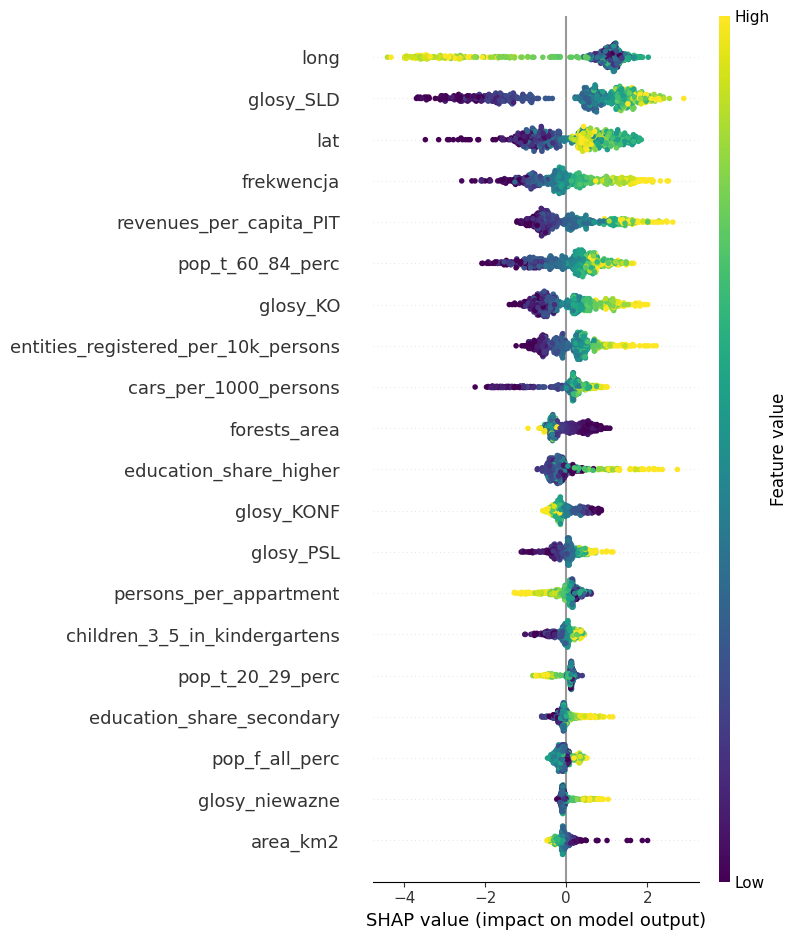

In [92]:
shap.summary_plot(shap_values_xgb, test[features], cmap='viridis', show=False)
ax = plt.gca()
plt.savefig("shap_plot.png")

<Figure size 640x480 with 0 Axes>

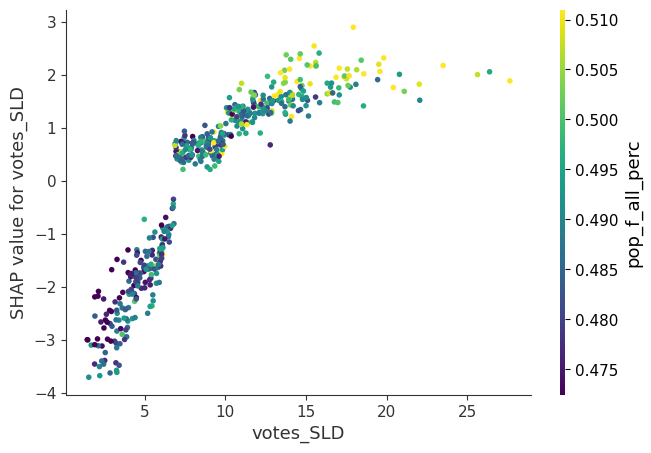

In [93]:
plt.figure()
shap.dependence_plot('glosy_SLD', shap_values_xgb, test[features], cmap='viridis', interaction_index='pop_f_all_perc', show=False)
ax = plt.gca()
plt.xlabel('votes_SLD')
plt.ylabel('SHAP value for votes_SLD')
plt.savefig("sld.png")
plt.show()

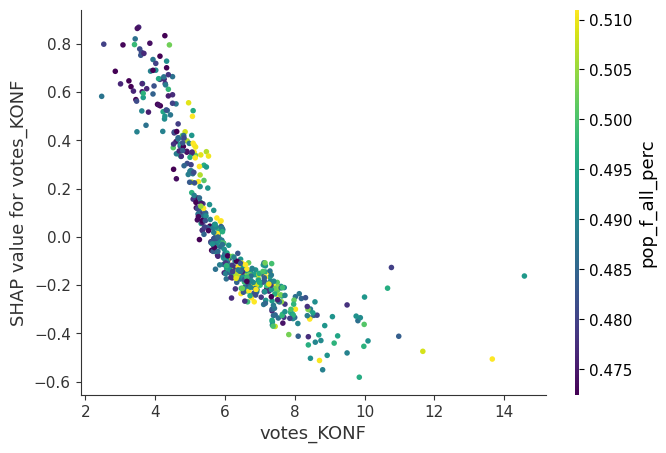

In [94]:
shap.dependence_plot('glosy_KONF', shap_values_xgb, test[features], cmap='viridis', interaction_index='pop_f_all_perc', show=False)
ax = plt.gca()
plt.xlabel('votes_KONF')
plt.ylabel('SHAP value for votes_KONF')
plt.savefig("konf.png")
plt.show()

<Figure size 640x480 with 0 Axes>

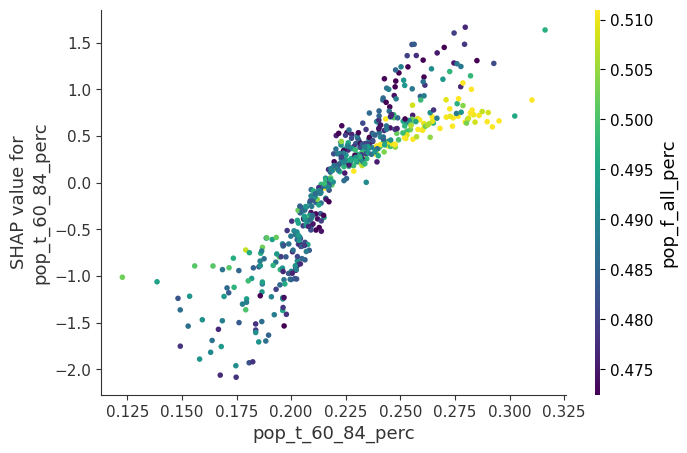

In [98]:
plt.figure()
shap.dependence_plot('pop_t_60_84_perc', shap_values_xgb, test[features], cmap='viridis', interaction_index='pop_f_all_perc', show=False)
ax = plt.gca()
plt.savefig("old.png")
plt.show()

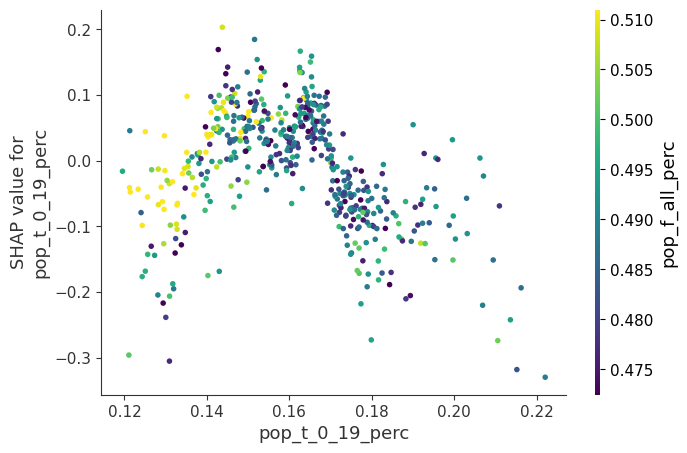

In [54]:
shap.dependence_plot('pop_t_0_19_perc', shap_values_xgb, test[features], cmap='viridis', interaction_index='pop_f_all_perc')

<Figure size 640x480 with 0 Axes>

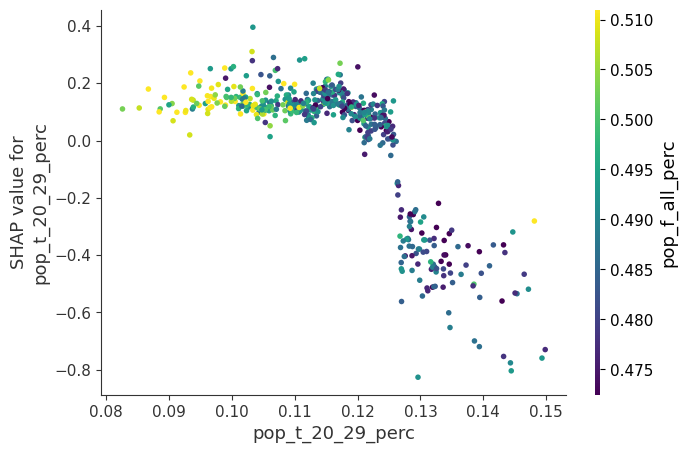

In [99]:
plt.figure()
shap.dependence_plot('pop_t_20_29_perc', shap_values_xgb, test[features], cmap='viridis', interaction_index='pop_f_all_perc', show=False)
ax = plt.gca()
plt.savefig("young.png")
plt.show()

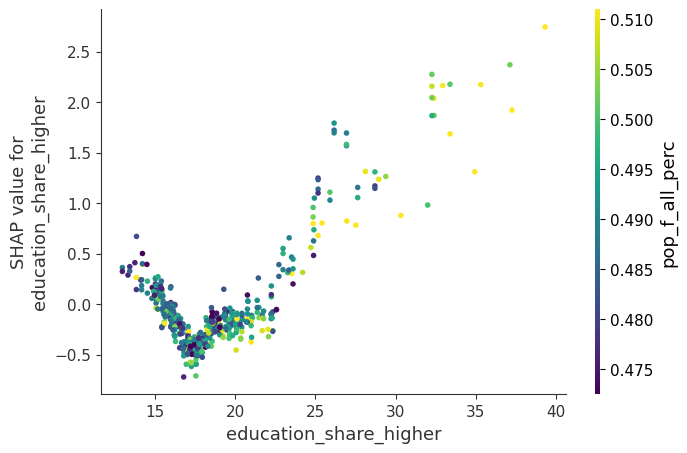

In [56]:
shap.dependence_plot('education_share_higher', shap_values_xgb, test[features], cmap='viridis', interaction_index='pop_f_all_perc')

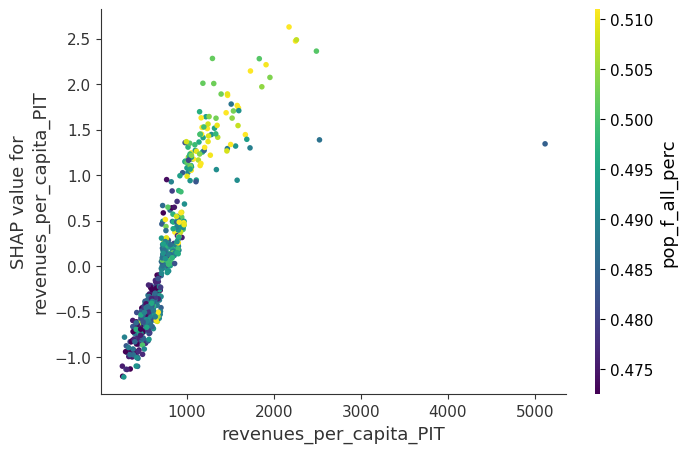

In [72]:
shap.dependence_plot('revenues_per_capita_PIT', shap_values_xgb, test[features], cmap='viridis', interaction_index='pop_f_all_perc')

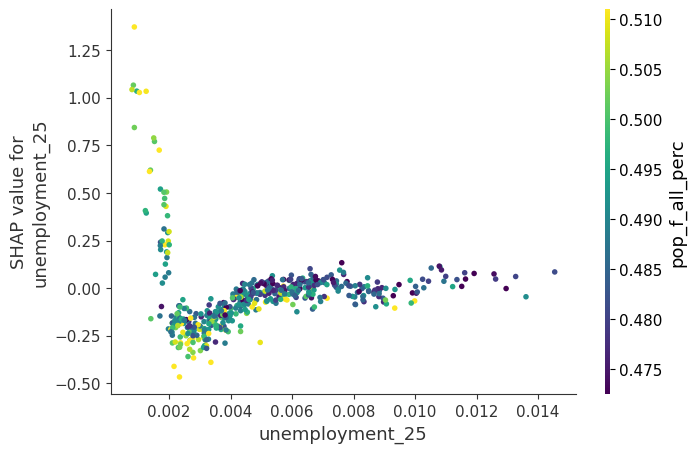

In [71]:
shap.dependence_plot('unemployment_25', shap_values_xgb, test[features], cmap='viridis', interaction_index='pop_f_all_perc')

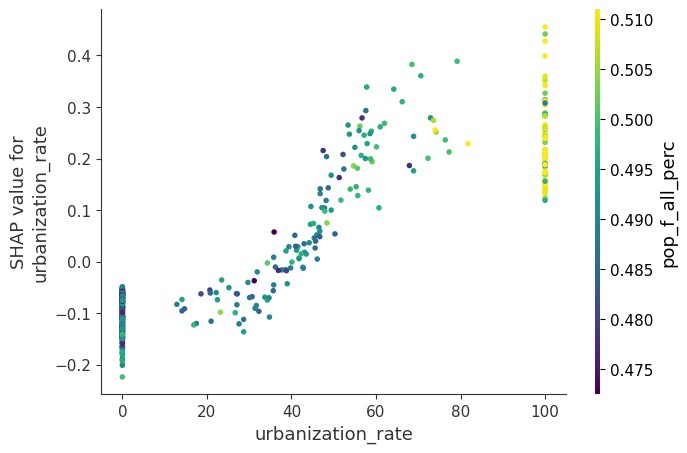

In [70]:
shap.dependence_plot('urbanization_rate', shap_values_xgb, test[features], cmap='viridis', interaction_index='pop_f_all_perc')

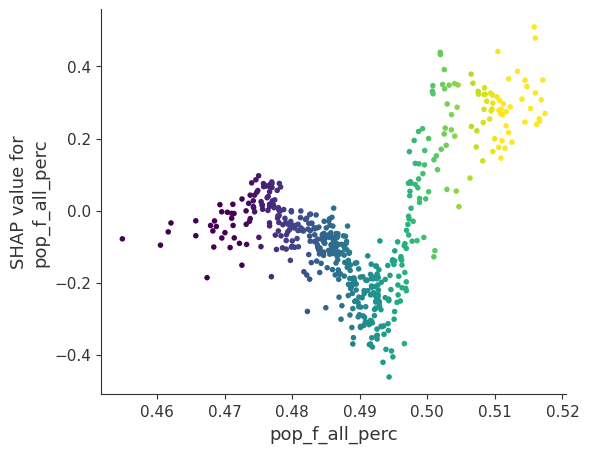

In [57]:
shap.dependence_plot('pop_f_all_perc', shap_values_xgb, test[features], cmap='viridis', interaction_index='pop_f_all_perc')

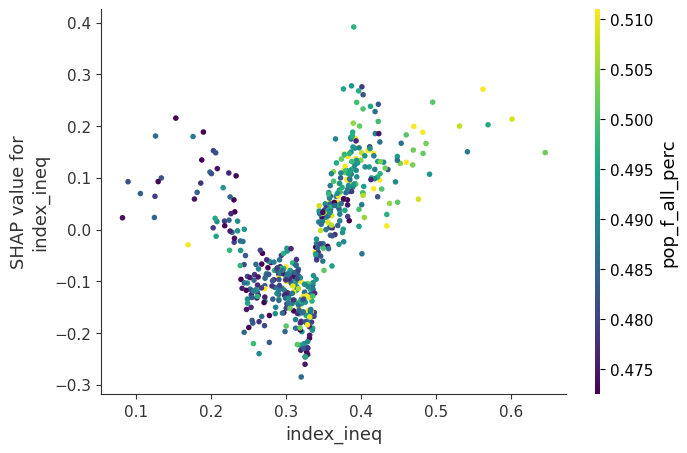

In [58]:
shap.dependence_plot('index_ineq', shap_values_xgb, test[features], cmap='viridis', interaction_index='pop_f_all_perc')

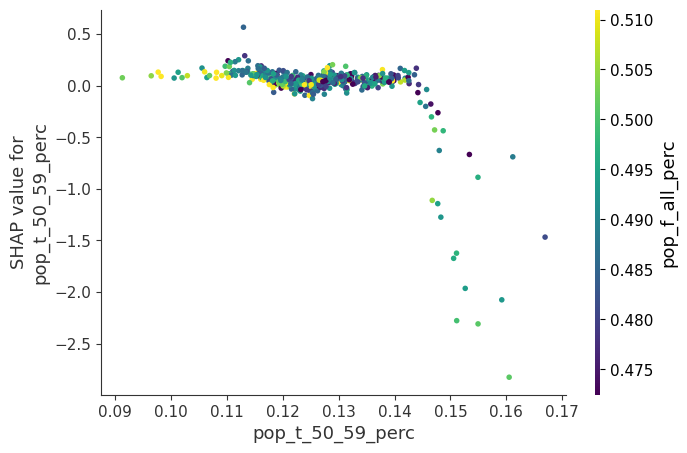

In [59]:
shap.dependence_plot('pop_t_50_59_perc', shap_values_xgb, test[features], cmap='viridis', interaction_index='pop_f_all_perc')

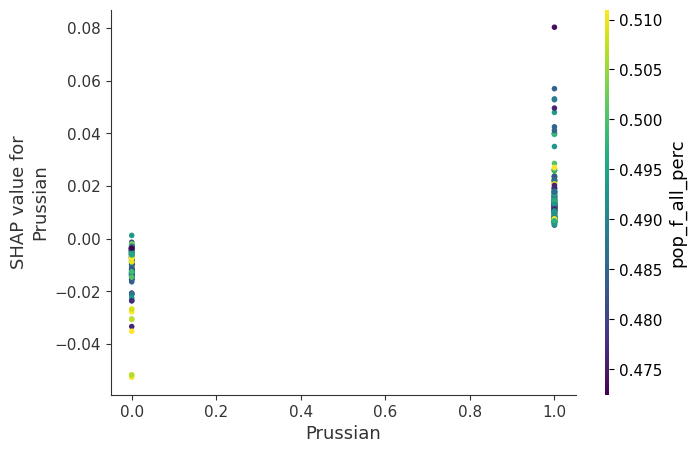

In [60]:
shap.dependence_plot('Prussian', shap_values_xgb, test[features], cmap='viridis', interaction_index='pop_f_all_perc')

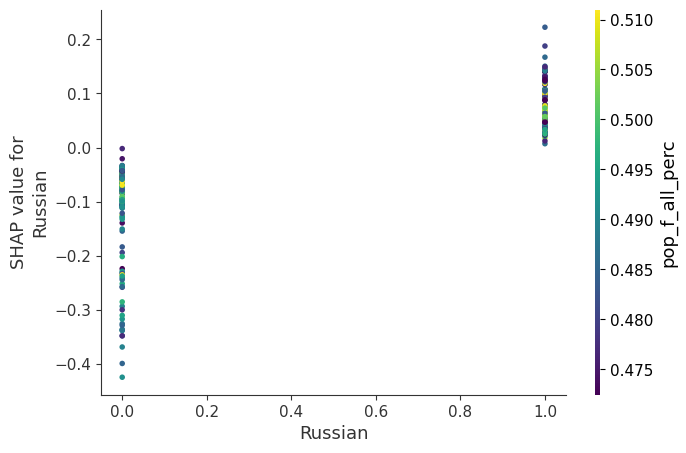

In [62]:
shap.dependence_plot('Russian', shap_values_xgb, test[features], cmap='viridis', interaction_index='pop_f_all_perc')

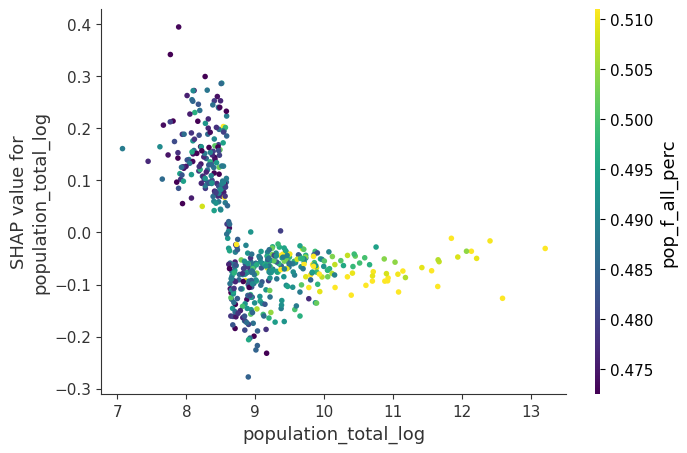

In [63]:
shap.dependence_plot('population_total_log', shap_values_xgb, test[features], cmap='viridis', interaction_index='pop_f_all_perc')

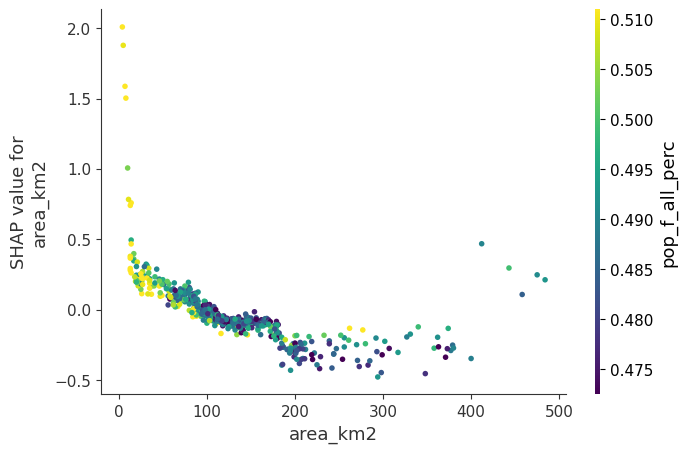

In [64]:
shap.dependence_plot('area_km2', shap_values_xgb, test[features], cmap='viridis', interaction_index='pop_f_all_perc')

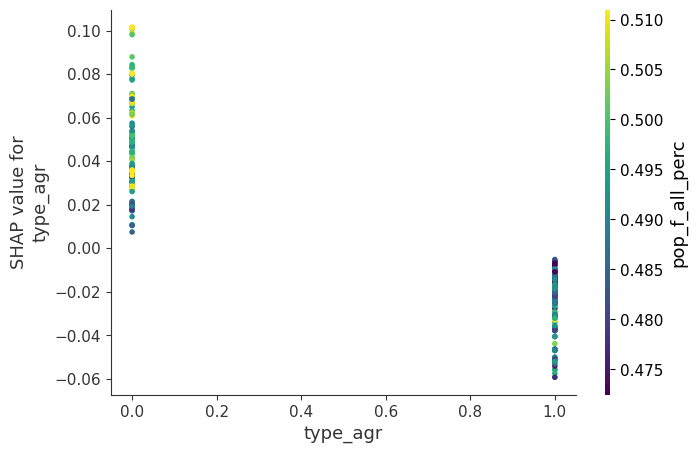

In [65]:
shap.dependence_plot('type_agr', shap_values_xgb, test[features], cmap='viridis', interaction_index='pop_f_all_perc')

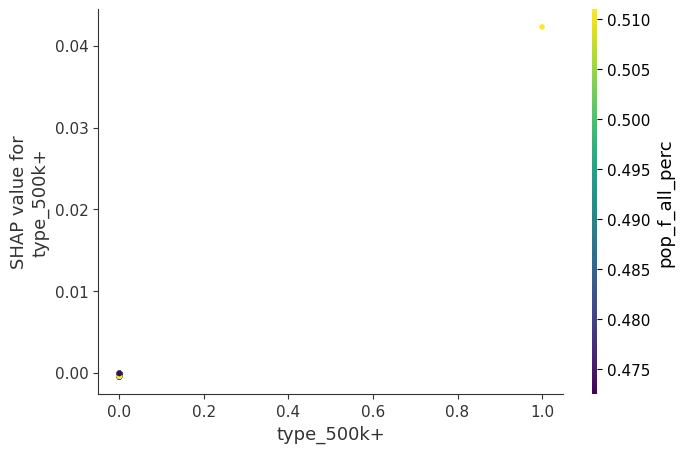

In [66]:
shap.dependence_plot('type_500k+', shap_values_xgb, test[features], cmap='viridis', interaction_index='pop_f_all_perc')

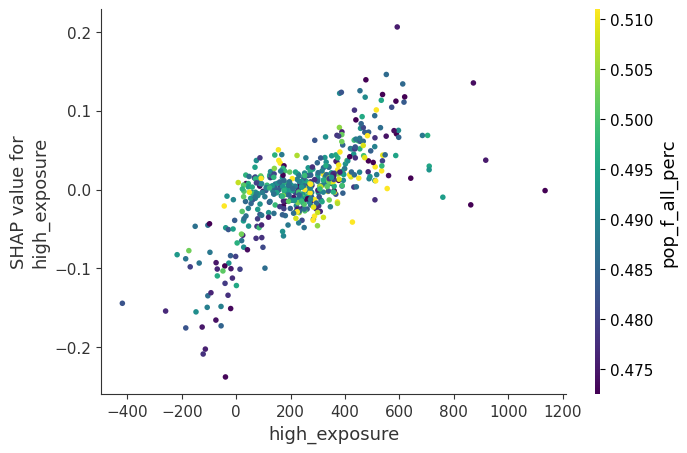

In [67]:
shap.dependence_plot('high_exposure', shap_values_xgb, test[features], cmap='viridis', interaction_index='pop_f_all_perc')

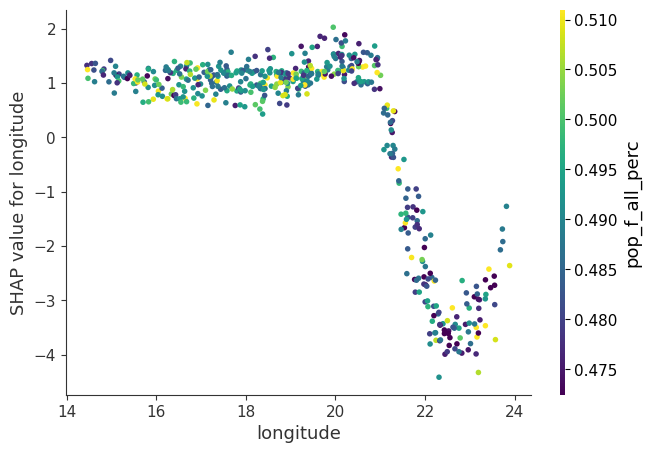

In [100]:
shap.dependence_plot('long', shap_values_xgb, test[features], cmap='viridis', interaction_index='pop_f_all_perc', show=False)
ax = plt.gca()
plt.xlabel('longitude')
plt.ylabel('SHAP value for longitude')
plt.savefig("long.png")
plt.show()

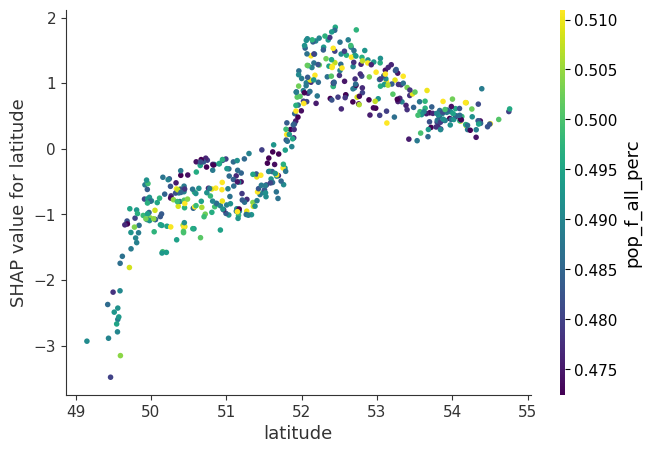

In [101]:
shap.dependence_plot('lat', shap_values_xgb, test[features], cmap='viridis', interaction_index='pop_f_all_perc', show=False)
ax = plt.gca()
plt.xlabel('latitude')
plt.ylabel('SHAP value for latitude')
plt.savefig("lat.png")
plt.show()